# PRJNA946141 - Tierney et al.

Article link: [https://www.nature.com/articles/s41467-024-52427-x](https://www.nature.com/articles/s41467-024-52427-x)

In [3]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
    library(dplyr)
})


In [5]:
coco <- read.csv(
    here("data", "processed",
        "PRJNA946141_processed.csv.gz")
)

coco_locs <- coco |>
    select(location, date) |>
    distinct() |>
    group_by(location) |>
    count(name = "dates") |>
    filter(dates > 10) |>
    pull(location)

coco <- coco[coco$location %in% coco_locs, ]
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon,ww_population,sample_type,zone
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
10459,10527,+10528.T,ins:10528:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
10460,10619,+10620.A,ins:10620:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
10461,10664,+10665.T,ins:10665:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
10462,10908,+10909.T,ins:10909:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
10463,11074,+11075.T,ins:11075:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
10464,11616,+11617.T,ins:11617:1,0,0,0,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university


In [6]:
lineages_in_paper <- c("B.1.1.7", "B.1.427", "B.1.526", "P.1", "B.1.617.2", "BA.1", "BA.2")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   7 144

In [7]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
 62.872   4.511  69.206 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,lat_lon,ww_population,sample_type,zone
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,9.893987e-01,NA,NA,BA.2,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
2,2.220558e-10,NA,NA,BA.1,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
3,3.408138e-04,NA,NA,B.1.1.7,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
4,4.545963e-11,NA,NA,P.1,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
5,8.771197e-04,NA,NA,B.1.427,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university
6,7.281420e-04,NA,NA,B.1.617.2,SRR23904527,2022-05-11,WR03-220511-39,152,31620408,PRJNA946141,WR03,NA,0,grab,college or university


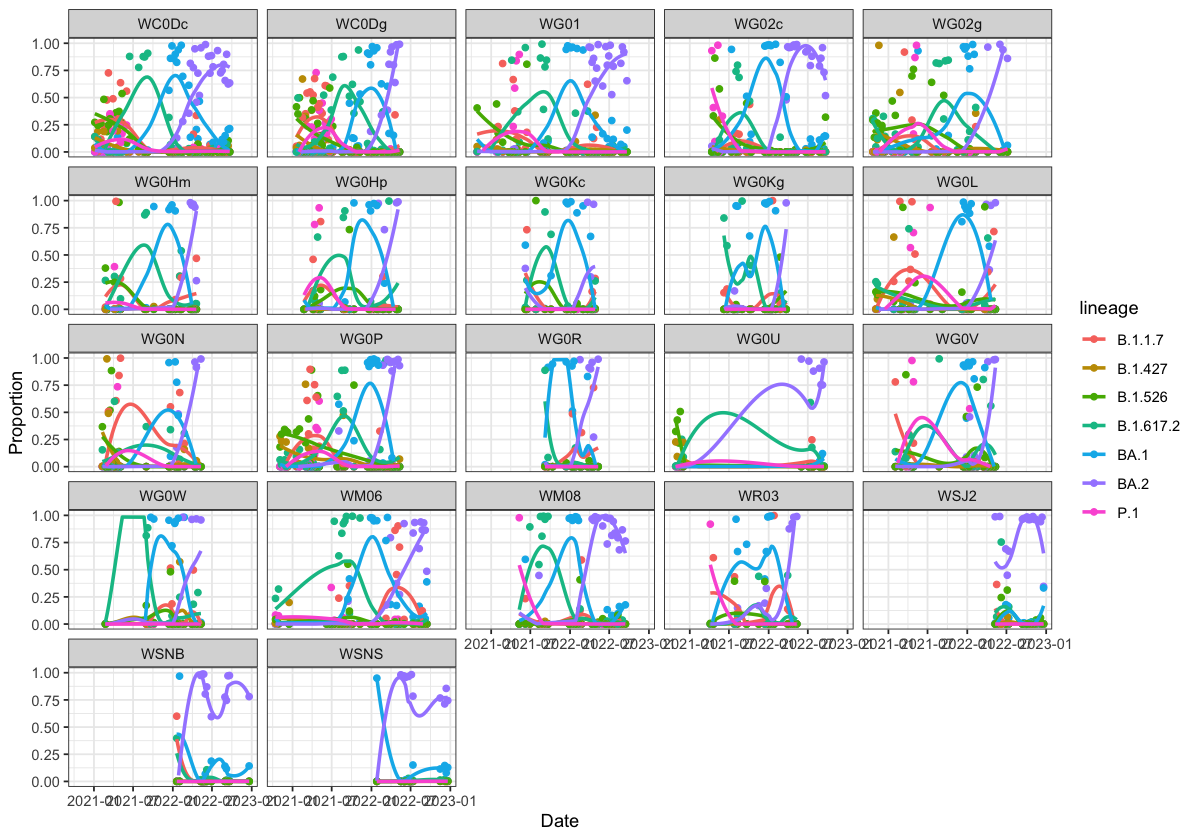

In [8]:
options(repr.plot.width = 10, repr.plot.height = 7)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
